In [69]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
#Import the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Feature Description

PassengerId: Unique id per passenger. We won't use it as a feature for the training of our ML model.\
Survived: Categorical, this is the target variable for this problem.\
Pclass: Categorical (ordinal), describes the passenger class. It is a proxy for socio-economic status. A priori it is an important feature.\
Name: Text. Contains numerous information as the passenger's names and title.\
Sex: Categorical (nominal). A priori it is an important feature.\
Age: Numerical (continous). A priori it is an important feature.\
SibSp: Numerical (discrete). The number of siblings and spouses aboard.\
Parch: Numerical (discrete). The number of parents and children aboard.\
Ticket: Text. Ticket id.\
Fare: Numeric (continous). Price paid for the travel.\
Cabin: Text. Contains alphanumeric caracters.\
Embarked: Categorical (nominal). Embarkment's port.\

In [71]:
train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

#  Feature Analysis

In [72]:
train_data.pivot_table(index="Pclass",values='Survived').reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [73]:
train_data.pivot_table(index="Sex",values='Survived').reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [74]:
train_data.pivot_table(index="Embarked",values='Survived').reset_index()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [75]:
train_data.pivot_table(index="SibSp",values='Survived').reset_index() # maybe those with siblings stuck together and survived?

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [76]:
train_data.pivot_table(index="Parch",values='Survived').reset_index() # maybe having a child got you on the boat, too many kids and you left them

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


No huge conclusions from this, into analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


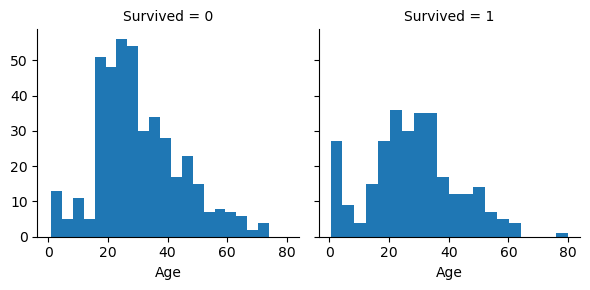

In [77]:
# Plot survival per Age bin
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

- There is a spike for infants who survived\
- Most are between the ages of 20-40

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


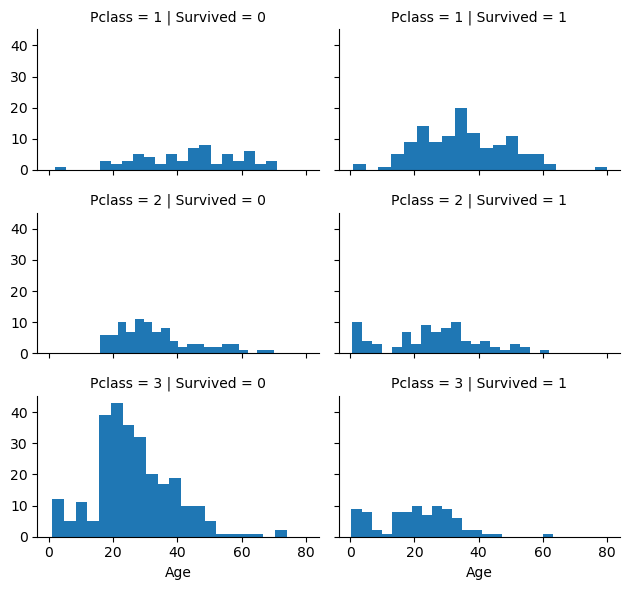

In [78]:
g = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)
plt.show()

- This shows that most people survived in class 1 than died, average age is lower for the survivors
- In class 2 far more infants survived than died
- in Class 3 - as many infants survived as the 20-40's

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


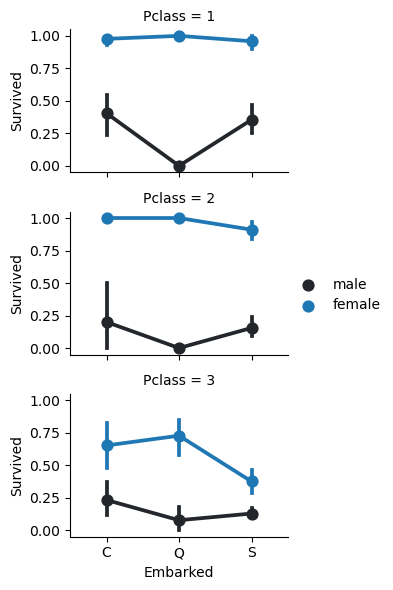

In [79]:
g = sns.FacetGrid(train_data, row='Pclass', height=2, aspect=1.6)
g.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', hue_order=['male', 'female'], order=['C', 'Q', 'S'])
g.add_legend()
plt.show()

- Women in class 1/2 had a really high survival rate, not as good in class 3 but still higher
- Survival rate for men from Q is worse than the other embarking locations 
- for women it's worse being from S - perhaps because they travelled further

**Checked the following so far:**
- Looked at Survived vs Pclass/Sex/Embarked/SibSp/Parch
- Survived vs Age
- Survived vs Pclass and Age
- Survived vs Embarked/Pclass/Sex

**Fare**

In [80]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

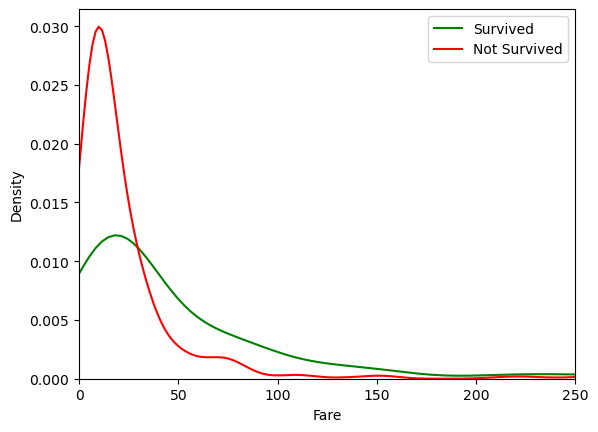

In [81]:
sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color="green")
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color="red")
plt.legend(['Survived', 'Not Survived'])
plt.xlim(0, 250) # Remove the tail
plt.show()

- some people paid no fares - needs looking into
- death rate for 0-30ish is way higher than survival rate
- after 30ish you're more likely to survive than die ...

In [82]:
# Lets investigate fares=0
train_data[train_data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


- those that paid no fare are males with no family on board, likely to be crew
- most died, worth making a feature for those that didnt pay fare

**Cabin**

In [83]:
train_data['Cabin'].value_counts(dropna=False, normalize=True)

NaN            0.771044
C23 C25 C27    0.004489
G6             0.004489
B96 B98        0.004489
C22 C26        0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: Cabin, Length: 148, dtype: float64

- 77% of them are na's

# Data Cleaning/Feature Engineering

Create a Function to combine the training and testing data

In [86]:
def combine_train_test(train_data, test_data):
    # Train
    train_columns = train_data.columns
    train_data['data_set'] = 'train'
   
    # Test
    test_data['Survived'] = 'unknown'
    test_data['data_set'] = 'test'
    test_data = test_data[train_columns]
    
    # Combine
    full_data = pd.concat([train_data, test_data], axis=0)
    
    return full_data   

In [87]:
combined = combine_train_test(train_data, test_data)
print(combined.shape)
combined.head(5)

(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_set
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [89]:
combined['data_set'].unique()

array(['train', 'test'], dtype=object)

**Look at each column to work out what processing we need to do**

In [90]:
combined.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data_set          0
dtype: int64

**Survived**

In [91]:
print(combined['Survived'][combined['data_set']=='train'].unique())

print(combined['Survived'][combined['data_set']=='test'].unique())

[0 1]
['unknown']


Don't need to do anything

- its 0 or 1 when train data
- it's unknown when test data

**Pclass**

In [92]:
combined['Pclass'].unique()

array([3, 1, 2])

**Name**

Want to get the title, then one hot encode

**Sex**

In [93]:
combined['Sex'].unique()

array(['male', 'female'], dtype=object)

Need to one hot encode

**Age**

We know there are NA's - going to use a model to predict results

**SibSp**

In [94]:
combined['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

Maybe need to group these, into 0, 1-3, 4+

**Parch**

In [95]:
combined['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

Group again: 0, 1-3, 4+

**Ticket**

Want to just get the ticket number maybe - but then we may have to one hot encode those though? \
Not sure what to do there

**Fare**

In [96]:
combined[combined['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_set
152,1044,unknown,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


Fill with mean probably - cann group by Pclass and so on

**Cabin**

In [97]:
combined['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Maybe get the number?

**Embarked**

In [98]:
combined['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Text(0, 0.5, 'Value Counts')

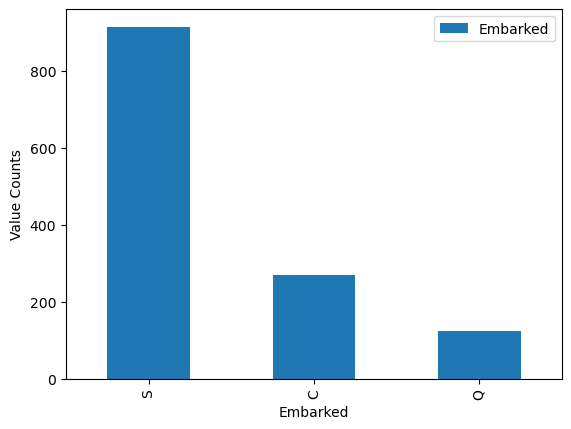

In [99]:
value_counts = pd.DataFrame(combined['Embarked'].value_counts())
value_counts.plot(kind='bar', legend='None')
plt.xlabel('Embarked')
plt.ylabel('Value Counts')

Most are from S - so will set NA to S

**Fixing NA's**

**Changes**:
- Fare: replace with median for that Class and where they embarked from
- Cabin: replace with a value to indicate we don't know their cabin, it's intereting 
- Embarked: replace with 'S' - because this is the modal location
- Title: get this, so that we can get the mean age grouped by title
- Age: replace with the mean

**Fixing NA Practice Code**

In [100]:
# Group the titles
mr = ('Mr','Mrs','Major', 'Capt', 'Col', 'Master', 'Don', 'Rev', 'Dr','the Countess', 'Lady', 'Sir', 'Jonkheer')
mrs = ('Miss','Ms')

In [101]:
def replace_nas(df):
    
    df['Cabin'] = df['Cabin'].fillna('X')
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Fare'] = df.groupby(['Pclass','Embarked'])['Fare'].transform('median')
    df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform('mean')
    
        
    return df

In [102]:
combined_tidy = replace_nas(combined)
combined_tidy.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_set
0,1,0,3,"Braund, Mr. Owen Harris",male,25.962264,1,0,A/5 21171,8.0500,X,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.037594,1,0,PC 17599,76.7292,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,22.185329,0,0,STON/O2. 3101282,8.0500,X,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.037594,1,0,113803,52.0000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,25.962264,0,0,373450,8.0500,X,S,train
5,6,0,3,"Moran, Mr. James",male,25.962264,0,0,330877,7.7500,X,Q,train
6,7,0,1,"McCarthy, Mr. Timothy J",male,41.029272,0,0,17463,52.0000,E46,S,train
7,8,0,3,"Palsson, Master. Gosta Leonard",male,25.962264,3,1,349909,8.0500,X,S,train
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,22.185329,0,2,347742,8.0500,X,S,train
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,27.499223,1,0,237736,15.3146,X,C,train


In [103]:
combined_tidy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
data_set       0
dtype: int64

In [122]:
def create_features(df):
    
    #Title:
    # Extract the title
    pattern = r',\s*([^,]+)\s*\.'
    df['Title']  = df['Name'].str.extract(pattern)
    # Conditions
    mr_con = np.isin(df['Title'], mr)
    mrs_con = np.isin(df['Title'], mrs)
    # Define
    df['Title'] = np.where(mr_con, 'mr','mrs')
    
    # Get Surname:
    df['surname'] = df['Name'].str.split(',').str[0]
    
    # Get Family Size
    df['family_size'] = df['SibSp'] + df['Parch'] + 1
    df['large_family'] = df['family_size'] > 4
    
    #Deck:
    df['deck'] = df['Cabin'].str.slice(0,1)
    
    # Count each time a each fare occurs
    fare_counts = df['Fare'].value_counts()
    df['fare_count'] = df['Fare'].map(fare_counts)
        
    # Count each time a each ticket occurs
    ticket_counts = df['Ticket'].value_counts()
    df['ticket_count'] = df['Ticket'].map(ticket_counts)
    
    # Compute real fare
    df['fare_per_ticket'] = df['Fare'] / df['ticket_count']
    df['fare_band'] = pd.qcut(df['fare_per_ticket'], 5, labels=[0, 1, 2, 3, 4])
    
    # Fare was paid for
    df['paid_fare'] = df['Fare'] != 0
    
    # Create Age bands
    def find_age_band(age):
        if age < 14:
            return 0
        elif age <= 30:
            return 1
        elif age <= 64:
            return 2
        else: 
            return 3

    # Create an age band column
    df['age_band'] = df['Age'].apply(find_age_band)
    
    # Mark out those that are minors
    df['is_minor'] = df['age_band'] == 0
    
    # Remove last digits of ticket and join columns
    df["ticket_formatted"] = df["Embarked"] + "-" + df["Ticket"].str[:-2] + "-" + df["Fare"].astype(str)
    
    # FInd a way to group people together
    df['group_id'] = df['surname']+ "-" + df["Pclass"].astype(str) + df["ticket_formatted"]
    
    # Count number of times group_id appears
    df['group_freq'] = df['group_id'].map(df['group_id'].value_counts())
    
    # get just the training data, group by group id and find the mean survival rate for each group
    df['group_survival_rate'] = df[df['data_set']=='train'].groupby('group_id')['Survived'].transform('mean')
    
    # Do the same, group by Sex and Pclass, but just for training data for those who are not in a group
    df['sex_pclass_survival_rate'] = df[(df['data_set']=='train') & (df['group_freq'] <= 1)].groupby(['Sex', 'Pclass'])['Survived'].transform('mean')
    
    # If you're in a group, use the group_survival_rate rate, otherwise use the sex_pclass_survival_rate
    #df['survival_rate'] = np.where((df['group_freq'] <= 1), df['sex_pclass_survival_rate'], df['group_survival_rate'])
    
    df['sex_pclass_survival_rate'][df['sex_pclass_survival_rate'].isnull()] = df['group_survival_rate']
    df['survival_rate'] = df['sex_pclass_survival_rate']
    
    # drop columns
    del df['sex_pclass_survival_rate']
    del df['group_survival_rate']
 
    
    return df

In [124]:
# Create Features
combined_building = create_features(combined_tidy)

combined_building.head(10)

/tmp/ipykernel_33/2215757516.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_pclass_survival_rate'][df['sex_pclass_survival_rate'].isnull()] = df['group_survival_rate']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,ticket_count,fare_per_ticket,fare_band,paid_fare,age_band,is_minor,ticket_formatted,group_id,group_freq,survival_rate
0,1,0,3,"Braund, Mr. Owen Harris",male,25.962264,1,0,A/5 21171,8.0500,...,1,8.050000,2,True,1,False,S-A/5 211-8.05,Braund-3S-A/5 211-8.05,1,0.128631
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.037594,1,0,PC 17599,76.7292,...,2,38.364600,4,True,2,False,C-PC 175-76.7292,Cumings-1C-PC 175-76.7292,2,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,22.185329,0,0,STON/O2. 3101282,8.0500,...,1,8.050000,2,True,1,False,S-STON/O2. 31012-8.05,Heikkinen-3S-STON/O2. 31012-8.05,1,0.661017
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.037594,1,0,113803,52.0000,...,2,26.000000,4,True,2,False,S-1138-52.0,Futrelle-1S-1138-52.0,2,0.500000
4,5,0,3,"Allen, Mr. William Henry",male,25.962264,0,0,373450,8.0500,...,1,8.050000,2,True,1,False,S-3734-8.05,Allen-3S-3734-8.05,1,0.128631
5,6,0,3,"Moran, Mr. James",male,25.962264,0,0,330877,7.7500,...,1,7.750000,1,True,1,False,Q-3308-7.75,Moran-3Q-3308-7.75,1,0.128631
6,7,0,1,"McCarthy, Mr. Timothy J",male,41.029272,0,0,17463,52.0000,...,2,26.000000,4,True,2,False,S-174-52.0,McCarthy-1S-174-52.0,1,0.342105
7,8,0,3,"Palsson, Master. Gosta Leonard",male,25.962264,3,1,349909,8.0500,...,5,1.610000,0,True,1,False,S-3499-8.05,Palsson-3S-3499-8.05,5,0.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,22.185329,0,2,347742,8.0500,...,3,2.683333,0,True,1,False,S-3477-8.05,Johnson-3S-3477-8.05,3,1.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,27.499223,1,0,237736,15.3146,...,2,7.657300,1,True,1,False,C-2377-15.3146,Nasser-2C-2377-15.3146,2,0.500000


In [125]:
combined_building.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            0
data_set            0
Title               0
surname             0
family_size         0
large_family        0
deck                0
fare_count          0
ticket_count        0
fare_per_ticket     0
fare_band           0
paid_fare           0
age_band            0
is_minor            0
ticket_formatted    0
group_id            0
group_freq          0
survival_rate       0
dtype: int64

In [126]:
combined_building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       1309 non-null   int64   
 1   Survived          1309 non-null   object  
 2   Pclass            1309 non-null   int64   
 3   Name              1309 non-null   object  
 4   Sex               1309 non-null   object  
 5   Age               1309 non-null   float64 
 6   SibSp             1309 non-null   int64   
 7   Parch             1309 non-null   int64   
 8   Ticket            1309 non-null   object  
 9   Fare              1309 non-null   float64 
 10  Cabin             1309 non-null   object  
 11  Embarked          1309 non-null   object  
 12  data_set          1309 non-null   object  
 13  Title             1309 non-null   object  
 14  surname           1309 non-null   object  
 15  family_size       1309 non-null   int64   
 16  large_family      1309 no

In [107]:
combined_building.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'data_set', 'Title',
       'surname', 'family_size', 'large_family', 'deck', 'fare_count',
       'ticket_count', 'fare_per_ticket', 'fare_band', 'paid_fare', 'age_band',
       'is_minor', 'ticket_formatted', 'group_id', 'group_freq',
       'survival_rate'],
      dtype='object')

In [108]:
final_dataset = combined_building

# Feature Preparation

In [127]:
from sklearn.preprocessing import minmax_scale, StandardScaler

def dummy_encoding(df, feature):
    dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(feature, axis=1)
    return df


def prepare_features(df, features):
    """Make the feature usable by an ML algorithm"""
    df = df.copy()
    
    for col in df.columns:
        if col not in features['nominal'] + features['ordinal'] \
            + features['boolean'] + features['numeric'] + ['data_set', 'Survived']:
            df = df.drop(col, axis=1)
    
    # Transform useful features
    for feature in features['nominal']:
        df[feature] = df[feature].astype('category')
        df = dummy_encoding(df, feature)
    
    for feature in features['ordinal'] + features['boolean']:
        df[feature] = df[feature].astype('int')
    
    for feature in features['ordinal'] + features['numeric']:
        scaler = StandardScaler()
        df[[feature]] = scaler.fit_transform(df[[feature]])
        df[feature + '_scaled'] = df[feature]
        df = df.drop(feature, axis=1)
    
    return df


# Define type of each feature
features = {
    'nominal': ['Sex'], # sex*pclass, 'title'
    'ordinal': ['Pclass', 'fare_band'], # 'age_band'
    'boolean': ['is_minor'], # 'embarked_C', 'is_large_family', 'has_fare', 'is_minor'
    'numeric': ['survival_rate'], # ['fare_per_ticket', 'Age']
}
combined_prepared = prepare_features(final_dataset, features)
combined_prepared.head()

,Survived,data_set,is_minor,Sex_male,Pclass_scaled,fare_band_scaled,survival_rate_scaled
0,0,train,0,1,0.841916,0.046171,-0.694300
1,1,train,0,0,-1.546098,1.485165,1.683538
2,1,train,0,0,0.841916,0.046171,0.758503
3,1,train,0,0,-1.546098,1.485165,0.319112
4,0,train,0,1,0.841916,0.046171,-0.694300


# Train the model and predict

In [129]:
X_train = combined_prepared[final_dataset['data_set'] == 'train'].drop(['Survived', 'data_set'], axis=1)
y_train = combined_prepared[final_dataset['data_set'] == 'train']['Survived'].astype(int)

X_test = combined_prepared[final_dataset['data_set'] == 'test'].drop(['Survived', 'data_set'], axis=1)

In [133]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    random_state=2,
    n_estimators=25,
    min_samples_split=20,
    oob_score=True)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

submission_file = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": predictions
})

submission_file.to_csv('/kaggle/working/submission.csv',index=False) 

print('Submission file has been exported.')
results.head()

Submission file has been exported.


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
